     ┌───┐     ┌──────────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├
     ├───┤┌───┐│  circuit-425 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1             ├──────╫─
     └───┘└───┘└──────────────┘      ║ 
c: 1/════════════════════════════════╩═
                                     0 
Counts: {'1': 1024}


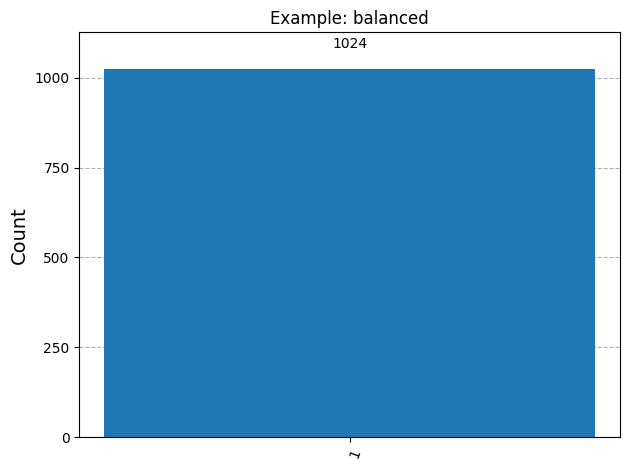

In [39]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt


# Deutsch oracle generator
def deutsch_oracle(case: str):
    qc = QuantumCircuit(2)
    if case == "constant0":  # f(x)=0 always
        pass
    elif case == "constant1":  # f(x)=1 always
        qc.x(1)
    elif case == "balanced":  # f(x)=x
        qc.cx(0, 1)
    elif case == "balanced_not":  # f(x)=not x
        qc.cx(0, 1)
        qc.x(1)
    return qc

# Deutsch algorithm circuit
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)
    qc.x(1)        # ancilla -> |1>
    qc.h(1)        # Hadamard on ancilla -> |−>
    qc.h(0)        # Hadamard on input qubit
    qc.append(oracle, [0, 1])  # Apply oracle
    qc.h(0)              # Hadamard on first qubit
    qc.measure(0, 0)
    return qc

# Choose oracle: try "balanced"
oracle = deutsch_oracle("balanced")
qc = deutsch_algorithm(oracle)
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: balanced")

     ┌───┐     ┌──────────────┐┌───┐┌─┐
q_0: ┤ H ├─────┤0             ├┤ H ├┤M├
     ├───┤┌───┐│  circuit-430 │└───┘└╥┘
q_1: ┤ X ├┤ H ├┤1             ├──────╫─
     └───┘└───┘└──────────────┘      ║ 
c: 1/════════════════════════════════╩═
                                     0 
Counts: {'0': 1024}


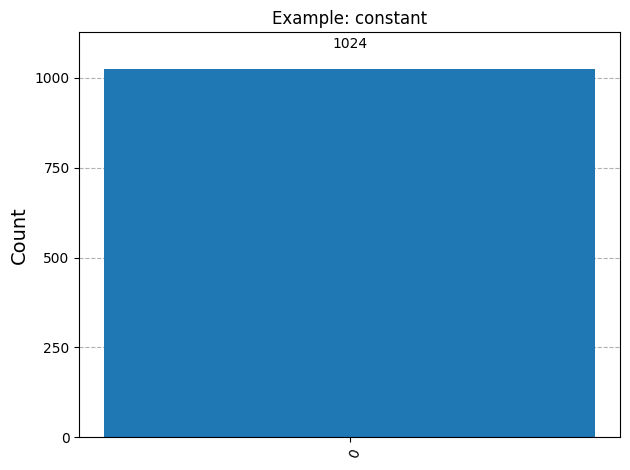

In [40]:
# Choose oracle: try "constant1"
oracle = deutsch_oracle("constant1")
qc = deutsch_algorithm(oracle)
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 1024).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: constant")

As expected, using Deutsch's algorithm we get all 1 if the function is balanced and all 0 if the function is constant.